In [376]:
from xml.etree.ElementTree import parse
from matplotlib import pyplot as plt
from glob import glob
import numpy as np
import json
import os


file_root = "dataset/INTERACTION-Dataset-DR-v1_1/maps/"
file_list = os.listdir(file_root)
s1 = set()
s1_sub =set()
way_dicts = []

for file in file_list:
#     file = file_list[file_num]
    if 'xy' in file:
        tree = parse(file_root + file)
        root = tree.getroot()
        node = root.findall('node')
        way = root.findall('way')
        relation = root.findall('relation')
        node_arr = []
        for n in node:
            x = float(n.get('x'))
            y = float(n.get('y'))
            node_arr.append([x,y])
        way_dict = []
        for w in way:
            t_dict = {}
            nds = w.findall("nd")
            xy = []
            for nd in nds:
                num = int(nd.get('ref'))-1000
                xy.append(node_arr[num])
            t_dict['node'] = xy
            t_dict['tag'] = {"type" : None, "subtype" : None}
            for t in w.findall("tag"):
                t_dict['tag'][t.get('k')] = t.get('v')
        #         tag_dict = {"type" : None, "subtype" : None}
        #         tag_dict[t.get('k')] = t.get('v')
        #         t_dict['tag'].append(tag_dict)
            way_dict.append(t_dict)
#         draw(way_dict)

        for w in way_dict:
            s1.add(w['tag']['type'])
            s1_sub.add(w['tag']['subtype'])
        #         s1.add(i['v'])
        way_dicts.append([way_dict, file])

In [377]:
map_name

'DR_USA_Intersection_EP0'

In [378]:
data_object["agent"].keys()

dict_keys(['xy', 'id', 'type', 'time'])

2700 25400
87
st:  0 86
2700 11300
191
st:  0 190
6400 25400
91
st:  0 90
12500 21500
60
st:  0 59
19500 25400
55
st:  0 54
20000 25400


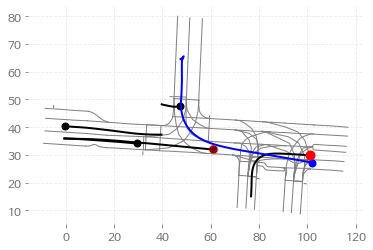

In [637]:
map_idx = 0  # interaction dataset의 map중 무슨 map으로 할 것인지
file_idx = 0 # mpa으로 만들어진 파일중 몇번째 파일을 사용할 것인지
map_name = way_dicts[map_idx][1].split(".")[0]


files_TE_data_object = glob("dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/" + map_name + "/TE_by_object_ver3/*")
files_TE_data_scene = glob("TE_by_scene/" + map_name + "/*")

with open(files_TE_data_object[file_idx]) as data:
    data_object = json.load(data)

scene_idx = int(files_TE_data_object[file_idx].split("/")[-1].split("_")[2])
with open(files_TE_data_scene[scene_idx]) as data:
    data_scene = json.load(data)    


agent_id = data_object["agent"]["id"]
social_ids = [A["id"] for A in data_object["social"]]

for j, w in enumerate(way_dicts[0][0]):
    xy = np.array(w['node'])
    plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)
print(data_object["agent"]["time"][0], data_object["agent"]["time"][-1])
draw_object_data(data_object)

2700 25400


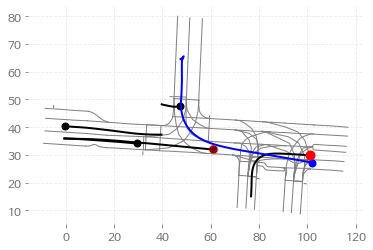

6400 31200


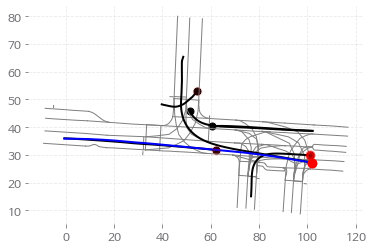

19500 41300


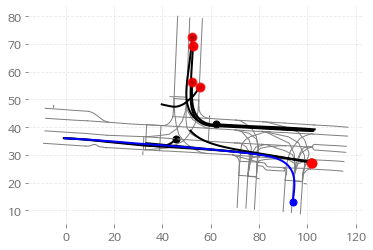

20000 32500


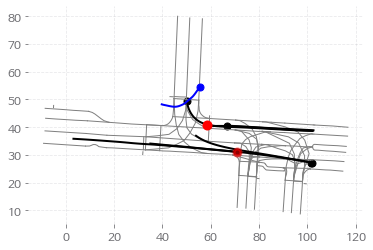

22100 38600


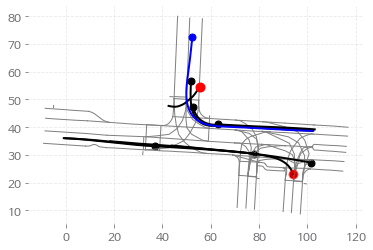

24900 41900


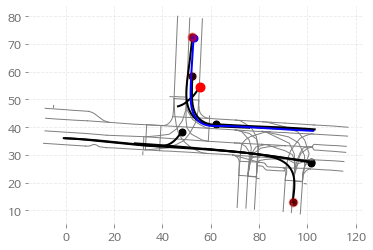

26700 45000


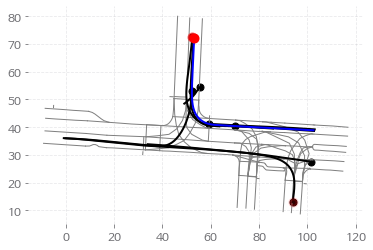

27700 40600


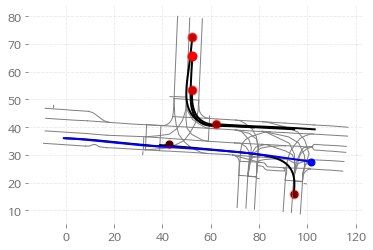

29800 53400


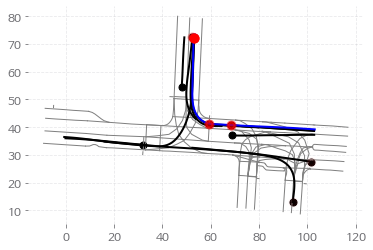

30500 49100


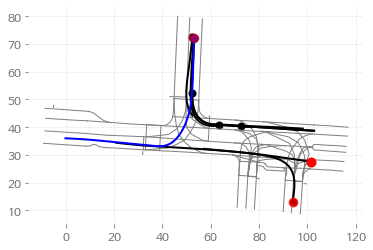

In [654]:
files_TE_data_object = glob("dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/" + map_name + "/TE_by_object_ver3/*")

for i in range(10):

    map_idx = 0  # interaction dataset의 map중 무슨 map으로 할 것인지
    file_idx = i # mpa으로 만들어진 파일중 몇번째 파일을 사용할 것인지
    map_name = way_dicts[map_idx][1].split(".")[0]



    with open(files_TE_data_object[file_idx]) as data:
        data_object = json.load(data)

    scene_idx = int(files_TE_data_object[file_idx].split("/")[-1].split("_")[2])


    agent_id = data_object["agent"]["id"]
    social_ids = [A["id"] for A in data_object["social"]]

    for j, w in enumerate(way_dicts[0][0]):
        xy = np.array(w['node'])
        plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)
    draw_object_data(data_object)

In [639]:
agent_id = data_object["agent"]["id"]
social_ids = [A["id"] for A in data_object["social"]]


In [593]:
A = np.array([10,20,30,40,50,60,70])
S = np.where(A <= 60)
E = np.where(A >= 20)
np.intersect1d(S,E)

array([1, 2, 3, 4, 5])

87
st:  0 86
2700 11300
191
st:  0 190
6400 25400
91
st:  0 90
12500 21500
60
st:  0 59
19500 25400
55
st:  0 54
20000 25400


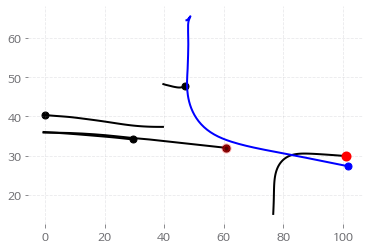

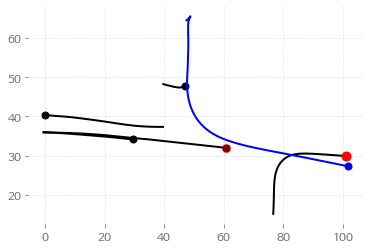

In [651]:
draw_object_data(data_object, 227)


In [653]:
def draw_object_data(data, time = None):
    agent_xy = np.array(data["agent"]['xy'])
    agent_time = np.array(data["agent"]["time"])
    social_xy = np.array([np.array(d["xy"]) for d in data["social"]])
    social_time = np.array([np.array(d["time"]) for d in data["social"]])
    social_TE = []
    flag = True

    social_TE = np.array(data["TE"])
    
    social_TE -= min(min(social_TE),0)
    social_TE /= max(0.0001, max(social_TE))
        
    
    if time == None:
        plt.plot(agent_xy[:,0],agent_xy[:,1], color = "blue", zorder = 3)
        plt.scatter(agent_xy[:,0][-1],agent_xy[:,1][-1], color = "blue", zorder = 3)

        for i, xy in enumerate(social_xy):
            start = np.where(social_time[i] >= agent_time[0])[0]
            end = np.where(social_time[i] <= agent_time[-1])[0]
            attend_time =  np.intersect1d(start, end)
            if len(attend_time) > 0:
                start = attend_time[0]
                end = attend_time[-1]
                plt.plot(xy[:,0][:],xy[:,1][:], color = "black")
                plt.scatter(xy[:,0][-1],xy[:,1][-1], color = "black")
                plt.scatter(xy[:,0][-1],xy[:,1][-1], color = "red", alpha = social_TE[i], linewidths = 3, zorder = 4)
            else:
                print("NOT INCLUDE : ", social_time[i][0],social_time[i][-1])

    else:
        plt.plot(agent_xy[:,0][:time+1],agent_xy[:,1][:time+1], color = "blue", zorder = 3)
        plt.scatter(agent_xy[:,0][time],agent_xy[:,1][time], color = "blue", zorder = 3)
        end = agent_time[time]  #몇 frame에서 끝나는지 정함
        
        for i, xy in enumerate(social_xy):
            if  social_time[i][0] < end and social_time[i][-1] > agent_time[0]:
                start = max(agent_time[0], social_time[i][0]) # 몇 frame에서 시작할지 정함
                start_idx = 0  # 애초에 dataset만들때 이렇게 정함
                end_idx = np.where(social_time[i] <= end)[0][-1]
                plt.plot(xy[:,0][:end_idx],xy[:,1][:end_idx], color = "black")
                plt.scatter(xy[:,0][end_idx],xy[:,1][end_idx], color = "black")
                plt.scatter(xy[:,0][end_idx],xy[:,1][end_idx], color = "red", alpha = social_TE[i], linewidths = 3, zorder = 4)
            else:
                print("NOT INCLUDE : ", social_time[i][0],social_time[i][-1])
                
        
    plt.show()


def draw_scene_data(data, start_time, end_time, agent_idx, time = None): # time은 agent의 몇번째 프레임까지 출력할지
    assert end_time // 25000 - start_time // 25000 < 3, "Agent time is too long"
    time_data = f"{start_time//25000}_{start_time//25000 + 50000}"
    scene_attendent = np.array(data["scene_attendent"][time_data]["id"])

    agent_xy = np.array(data["data"][agent_idx]["xy"])  # data에서는 agent_xy의 좌표를 그대로 쓰는것이 맞음
    agent_time = np.array(data["data"][agent_idx]["time"])
    agent_idx = np.where(scene_attendent == agent_idx)[0][0] # scene에서는 scene_attendent안에 agent가 몇번째 있는지가 중요
    
    
    
    
    social_xy = np.array([np.array(data["data"][i]["xy"]) for i in scene_attendent])
    social_time = np.array([np.array(data["data"][i]["time"]) for i in scene_attendent])
    
#     social_TE = np.array(data['TEmatrix'][time_data][agent_idx])
    
    social_TE = np.array(data['TEmatrix'][time_data])[:,agent_idx]

    
    print(social_TE[agent_idx])
    social_TE -= min(min(social_TE),0)
    social_TE /= max(0.0001, max(social_TE))
    print(social_TE)
    
    if time == None:
        time = len(agent_xy)
        plt.plot(agent_xy[:,0][:time],agent_xy[:,1][:time], color = "blue", zorder = 6)
        plt.scatter(agent_xy[:,0][time-1],agent_xy[:,1][time-1], color = "blue", zorder = 6)
#         plt.text(agent_xy[:,0][time-1],agent_xy[:,1][time-1],str(agent_time[0]) + "~" + str(agent_time[-1]) ,color = "blue", zorder = 6)

        for i, xy in enumerate(social_xy):
            if i != agent_idx:
                max_time = min(time, len(xy[:,0]))
                plt.plot(xy[:,0][:],xy[:,1][:], color = "black")
                plt.scatter(xy[:,0][-1],xy[:,1][-1], color = "black", linewidths = 3)
                plt.scatter(xy[:,0][-1],xy[:,1][-1], color = "red", alpha = social_TE[i], linewidths = 3, zorder = 4)
#                 plt.text(xy[:,0][-1],xy[:,1][-1], str(social_time[i][0]) + "~"+str(social_time[i][-1]))
    else:
        print(len(agent_time))
        start = agent_time[0]
        end = agent_time[time]
        print("agent : ", start, end)
        plt.plot(agent_xy[:,0][:time],agent_xy[:,1][:time], color = "blue", zorder = 6)
        plt.scatter(agent_xy[:,0][time-1],agent_xy[:,1][time-1], color = "blue", zorder = 6)

        for i, xy in enumerate(social_xy):
            if i != agent_idx:
                start_idx = np.where(start <=social_time[i])[0]
                end_idx = np.where(social_time[i]<=end)[0]
                print(social_time[i][0], social_time[i][-1],end)
                print("="*100)
                if len(start_idx) > 0 and len(end_idx) > 0:
                    if len(start_idx) == 0: # start_idx보다 나중에 나타났고 end_idx는 가지고 있는 경우
                        start_idx = 0
                        end_idx = end_idx[-1]
                    elif len(end_idx) == 0: # end_idx보다 먼저 끝난 경우
                        end_idx = -1
                        start_idx = start_idx[0]
                    else:
                        start_idx = start_idx[0]
                        end_idx = end_idx[0]
                        
                    plt.plot(xy[:,0][start_idx:end_idx],xy[:,1][start_idx:end_idx], color = "black")
                    plt.scatter(xy[:,0][end_idx],xy[:,1][end_idx], color = "black", linewidths = 3)
                    plt.scatter(xy[:,0][end_idx],xy[:,1][end_idx], color = "red", alpha = social_TE[i], linewidths = 3, zorder = 4)
    plt.show()

0.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


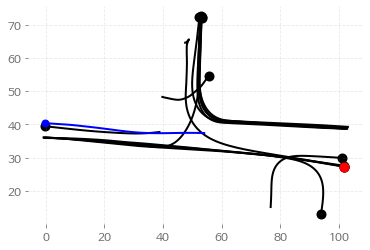

In [544]:
draw_scene_data(data_scene, 0, 50000, 1)

In [497]:
social_time = np.array([1,2,3,4,5,6,7,8,9,10])
start = 4
end = 7
start_idx = np.where(start <=social_time and start<=end)[0]
start_idx

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

0.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
113
agent :  100 10100
100 7200 10100
2700 25400 10100
6400 31200 10100
12500 21500 10100
19500 41300 10100
20000 32500 10100
22100 38600 10100
24900 41900 10100
26700 45000 10100
27700 40600 10100
29800 53400 10100
30500 49100 10100
37300 64800 10100
41800 68600 10100


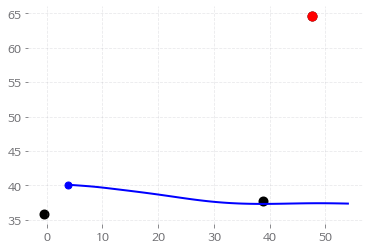

In [545]:
draw_scene_data(data_scene, 0, 50000, 1, 100)

In [382]:
# A = np.array(data_scene['TEmatrix']["0_50000"])[3]
# B =  np.array(data_scene['TEmatrix']["0_50000"])[:,3]
# print(A)
# print(B)


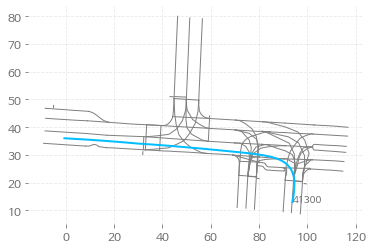

In [412]:
for D in data_scene["data"]:
    if(D["time"][0] == 19500):
    
        for i, w in enumerate(way_dicts[0][0]):
            xy = np.array(w['node'])
            plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)    
        xy = np.array(D["xy"])
        plt.plot(xy[:,0], xy[:,1])
        plt.text(xy[:,0][-1], xy[:,1][-1], str(D["time"][-1]))
        plt.show()
        break

0.0
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


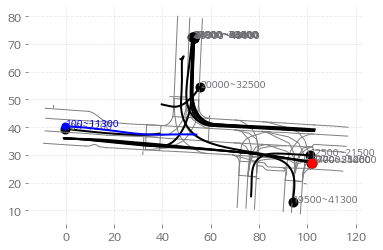

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


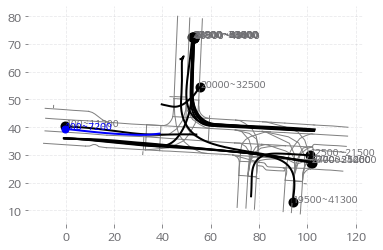

0.0
[0.        0.        0.        0.2240952 1.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.       ]


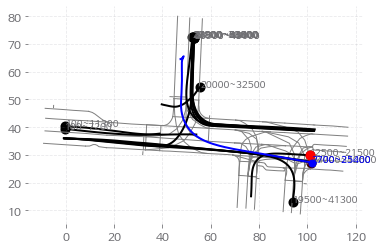

0.0
[0.         0.         0.71540057 0.         1.         0.09955479
 0.10860523 0.0497774  0.         0.         0.         0.
 0.         0.         0.        ]


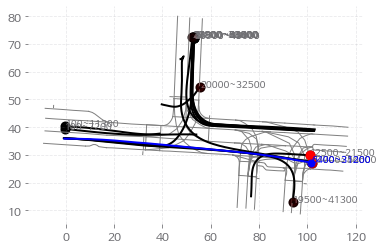

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


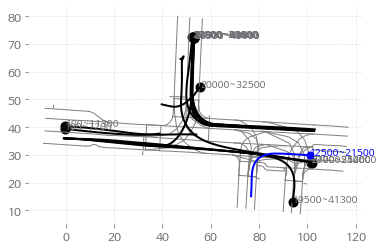

0.0
[0.00000000e+00 0.00000000e+00 0.00000000e+00 7.62837771e-01
 0.00000000e+00 0.00000000e+00 1.00000000e+00 7.88855400e-01
 9.48161067e-01 6.92460528e-01 0.00000000e+00 2.32352577e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


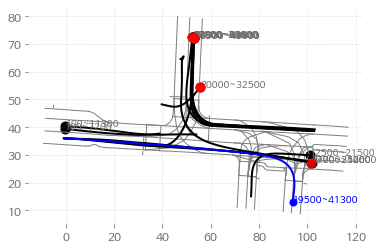

0.0
[7.44858720e-14 7.44858720e-14 7.44858720e-14 0.00000000e+00
 7.44858720e-14 1.00000000e+00 7.44858720e-14 6.51368049e-01
 8.94545455e-01 7.44858720e-14 7.44858720e-14 7.44858720e-14
 7.44858720e-14 7.44858720e-14 7.44858720e-14]


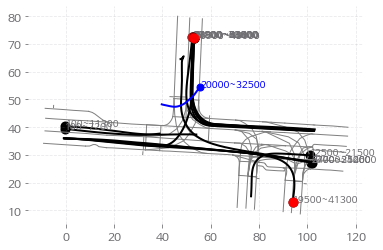

0.0
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.72743111e-01 1.00000000e+00 0.00000000e+00
 0.00000000e+00 6.23743481e-14 0.00000000e+00 6.23743481e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


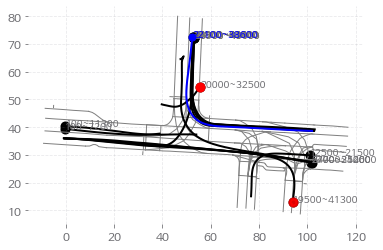

0.0
[8.90350021e-15 8.90350021e-15 8.90350021e-15 8.90350021e-15
 8.90350021e-15 2.96174715e-01 1.00000000e+00 3.90541717e-01
 8.90350021e-15 9.73677268e-02 8.90350021e-15 8.90350021e-15
 0.00000000e+00 8.90350021e-15 8.90350021e-15]


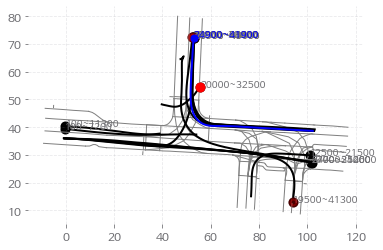

0.0
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.72965085e-01 0.00000000e+00 1.00000000e+00
 6.05077955e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.72484806e-14 0.00000000e+00 0.00000000e+00]


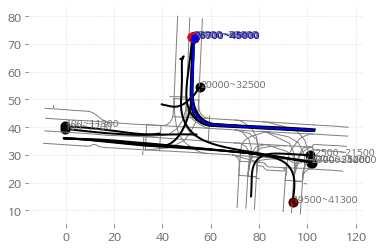

0.0
[0.         0.         0.         0.         0.         0.52076596
 0.         0.63507416 1.         0.61819211 0.         0.46669321
 0.61313523 0.         0.        ]


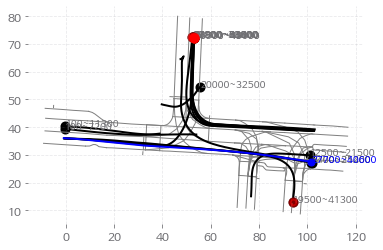

0.0
[0.         0.         0.         0.         0.         0.06563979
 0.         0.2039522  0.10392966 1.         0.         0.
 0.48958351 0.47481167 0.48862877]


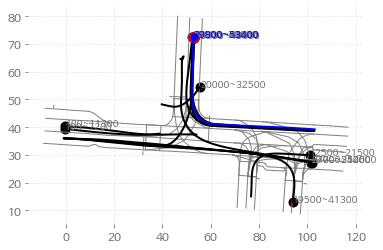

0.0
[1.15755004e-14 1.15755004e-14 1.15755004e-14 1.15755004e-14
 1.15755004e-14 6.12509552e-01 1.15755004e-14 2.69944579e-01
 2.48244854e-01 2.31510008e-14 1.00000000e+00 0.00000000e+00
 1.15755004e-14 1.15755004e-14 1.15755004e-14]


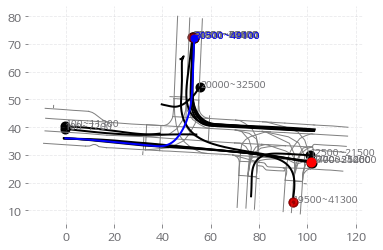

0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.0543753  0.         1.
 0.16530282 0.         0.03125896]


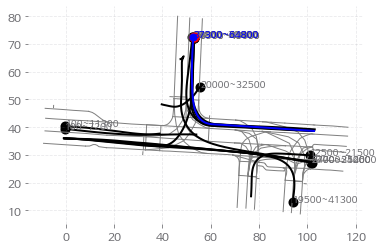

0.0
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.44418814
 1.         0.72087271 0.        ]


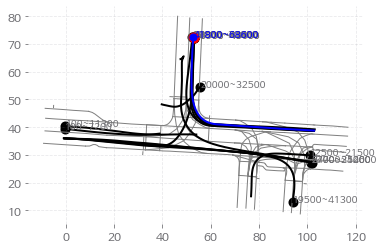

IndexError: index 0 is out of bounds for axis 0 with size 0

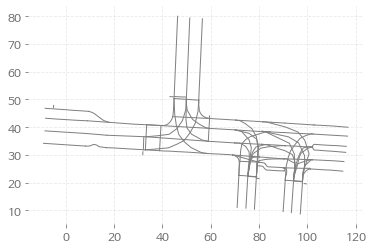

In [402]:
for z in range(0,25):

    for i, w in enumerate(way_dicts[0][0]):
        xy = np.array(w['node'])
        plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)

    draw_scene_data(data_scene, 0, 50000, z+1)

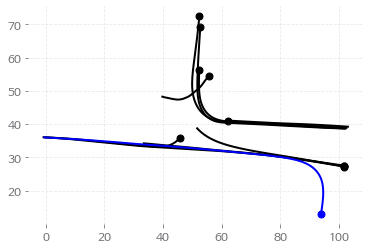

In [68]:
draw_object_data(data_object)

In [372]:
with open(files_TE_data_scene[1]) as data:
    data_scene = json.load(data)    

In [124]:
def draw(agent_xy, social_xy):
    agent_xy = np.array(agent_xy)
    social_xy = np.array(social_xy)
     

NameError: name 'agent_xy_scene' is not defined

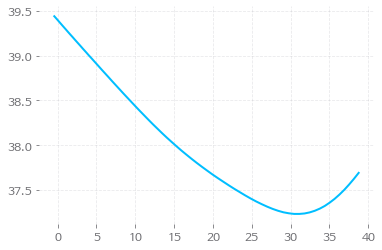

2


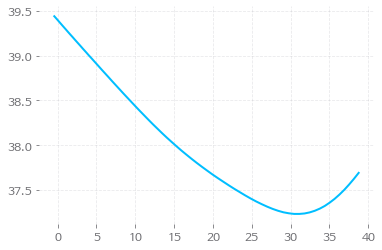

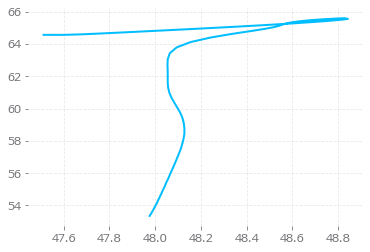

3


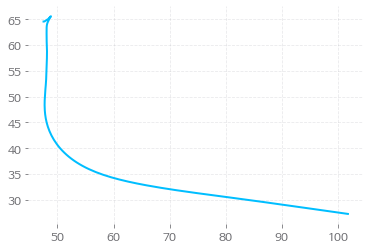

In [129]:
for i in range(len(data_object["social"])):
    agent_xy_object = np.array(data_object["social"][i]['xy'])
    plt.plot(agent_xy_object[:,0],agent_xy_object[:,1])
    plt.show()
    agent_id = data_object["social"][i]["id"]
    print(agent_id)
    agent_xy_scene = np.array(data_scene["data"][agent_id]["xy"])
    plt.plot(agent_xy_scene[:,0],agent_xy_scene[:,1])
    plt.show()

    

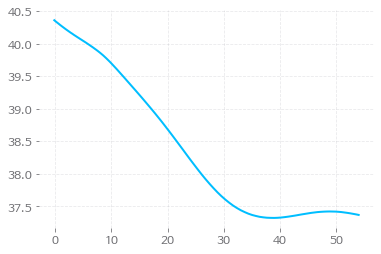

In [66]:
json_data["TEmatrix"]["0_50000"]

[[0.0,
  0.018271441981849268,
  0.005543345543345346,
  -0.0011574074074074403,
  0.019309135841281355,
  0.0,
  0.017851158531390875,
  0.008899240855762436,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.011297288358698143,
  0.0,
  0.004062729582637203,
  0.0051091269841270215,
  0.013440550802185314,
  0.0,
  0.00578721578721586,
  0.012755381245200148,
  0.03993970027807947,
  0.017753083416558235,
  0.02119265298748263,
  0.0,
  0.0008510638297871687,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.022056653485073463,
  0.0103645412967448,
  0.0,
  0.0017361111111111605,
  0.016920238703661262,
  0.003831417624521105,
  0.015248075278015305,
  0.0026724975704566223,
  0.008478584347624496,
  0.021530578763026442,
  0.0,
  2.220446049250313e-16,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0456336779012414,
  0.0,
  0.03162778579445247,
  0.0,
  0.0754220234817315,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

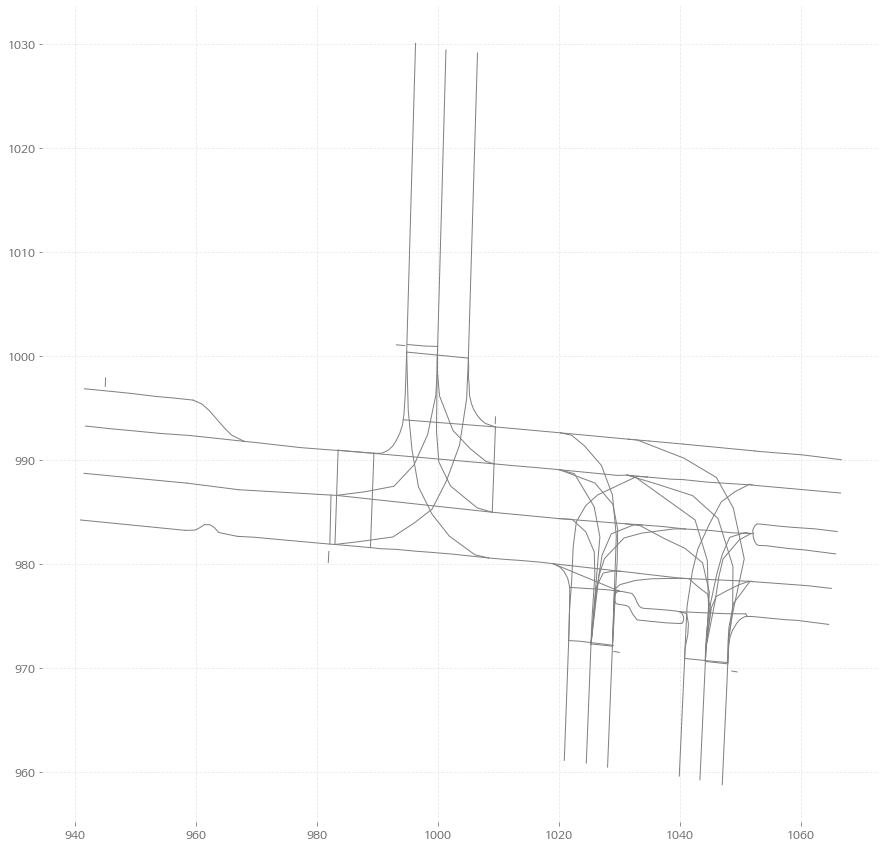

In [30]:
plt.figure(figsize=(15,15))
for i, w in enumerate(way_dicts[0][0]):
    xy = np.array(w['node'])
    plt.plot(xy[:,0],xy[:,1], color='gray',linewidth=1)
plt.show()        
        # print(s1)
# print(s1_sub)